Import Packages

In [303]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

Import Dataset

In [256]:
df = pd.read_csv('/kaggle/input/mental-health-and-technology-usage-dataset/mental_health_and_technology_usage_2024.csv')
df.head()

,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No
3,USER-00004,25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes
4,USER-00005,53,Male,1.20,0.56,0.29,12.63,Good,Low,5.55,4.00,No,Positive,Yes


Describe dataset

In [257]:
df.describe()


,Age,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Sleep_Hours,Physical_Activity_Hours
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,41.518600,6.474341,3.972321,2.515598,7.975765,6.500724,5.003860
std,13.920217,3.169022,2.313707,1.446748,4.042608,1.450933,2.905044
min,18.000000,1.000000,0.000000,0.000000,1.000000,4.000000,0.000000
25%,29.000000,3.760000,1.980000,1.260000,4.520000,5.260000,2.490000
50%,42.000000,6.425000,3.950000,2.520000,7.900000,6.500000,4.990000
75%,54.000000,9.212500,5.990000,3.790000,11.500000,7.760000,7.540000
max,65.000000,12.000000,8.000000,5.000000,15.000000,9.000000,10.000000


In [258]:
df.dtypes

User_ID                      object
Age                           int64
Gender                       object
Technology_Usage_Hours      float64
Social_Media_Usage_Hours    float64
Gaming_Hours                float64
Screen_Time_Hours           float64
Mental_Health_Status         object
Stress_Level                 object
Sleep_Hours                 float64
Physical_Activity_Hours     float64
Support_Systems_Access       object
Work_Environment_Impact      object
Online_Support_Usage         object
dtype: object

Check for duplication of rows in dataset

In [259]:
df.duplicated().sum()

0

Explore means of numerical variables in dataset

In [260]:
 df.groupby(['Gender','Mental_Health_Status', 'Stress_Level']).agg({
    'Screen_Time_Hours': 'mean',
    'Sleep_Hours': 'mean',
    'Technology_Usage_Hours':'mean',
    'Social_Media_Usage_Hours': 'mean',
    'Gaming_Hours': 'mean',
    'Physical_Activity_Hours':'mean'
}).reset_index()

,Gender,Mental_Health_Status,Stress_Level,Screen_Time_Hours,Sleep_Hours,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Physical_Activity_Hours
0,Female,Excellent,High,7.970778,6.477315,6.458872,3.742568,2.627276,5.174163
1,Female,Excellent,Low,8.330945,6.470000,6.576352,4.006482,2.471726,5.013811
2,Female,Excellent,Medium,7.971915,6.326631,6.273262,3.763333,2.571312,5.070142
3,Female,Fair,High,7.850481,6.522407,6.233963,4.090185,2.417852,4.799222
4,Female,Fair,Low,8.009506,6.409753,6.274897,4.048642,2.389342,5.158395
5,Female,Fair,Medium,8.107632,6.670940,6.021917,4.186880,2.527256,4.787594
6,Female,Good,High,8.436280,6.635973,6.648089,4.102389,2.587372,4.965973
7,Female,Good,Low,8.114777,6.508007,6.550997,3.849175,2.544639,4.726667
8,Female,Good,Medium,7.927376,6.471331,6.628517,3.860000,2.540570,5.308289
9,Female,Poor,High,8.116690,6.539930,6.740105,4.069791,2.488885,5.108293


In [261]:
# Summary statistics by Mental Health Status
summary_stats = df.groupby('Mental_Health_Status').describe()
print(summary_stats)

                         Age                                                \
                       count       mean        std   min   25%   50%   75%   
Mental_Health_Status                                                         
Excellent             2518.0  41.551231  13.863471  18.0  30.0  42.0  53.0   
Fair                  2490.0  42.006827  14.036469  18.0  29.0  42.0  54.0   
Good                  2508.0  41.237241  13.875046  18.0  29.0  41.0  53.0   
Poor                  2484.0  41.280193  13.900993  18.0  29.0  41.0  54.0   

                           Technology_Usage_Hours            ... Sleep_Hours  \
                       max                  count      mean  ...         75%   
Mental_Health_Status                                         ...               
Excellent             65.0                 2518.0  6.438995  ...        7.75   
Fair                  65.0                 2490.0  6.352145  ...        7.75   
Good                  65.0                 2508.0  6.

Exploratory Data Analysis (EDA)

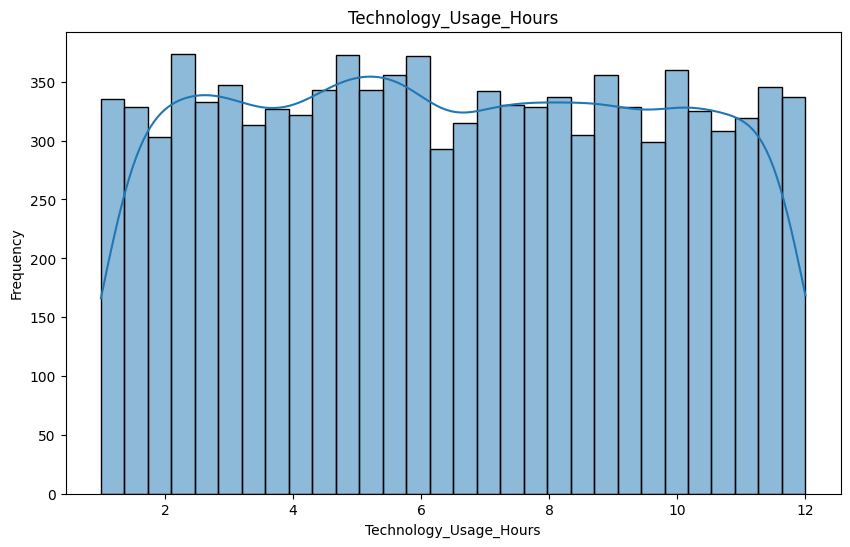

In [262]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Technology_Usage_Hours'], kde=True, bins=30, palette='Set2')
plt.title('Technology_Usage_Hours')
plt.xlabel('Technology_Usage_Hours')
plt.ylabel('Frequency')
plt.show()

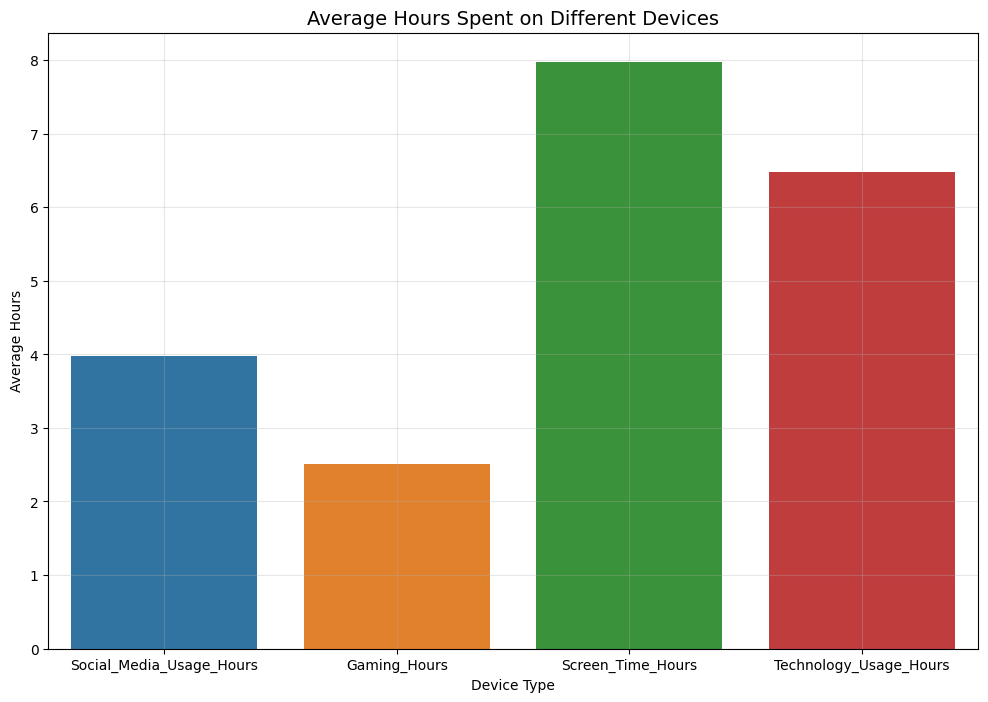

In [263]:
plt.figure(figsize=(12, 8))
screen_devices = ['Social_Media_Usage_Hours', 'Gaming_Hours', 'Screen_Time_Hours', 'Technology_Usage_Hours']
sns.barplot(x=screen_devices, y=df[screen_devices].mean(), palette='Set2')
plt.title('Average Hours Spent on Different Devices', fontsize=14)
plt.xlabel('Device Type')
plt.ylabel('Average Hours')
plt.grid(True, alpha=0.3)
plt.show()

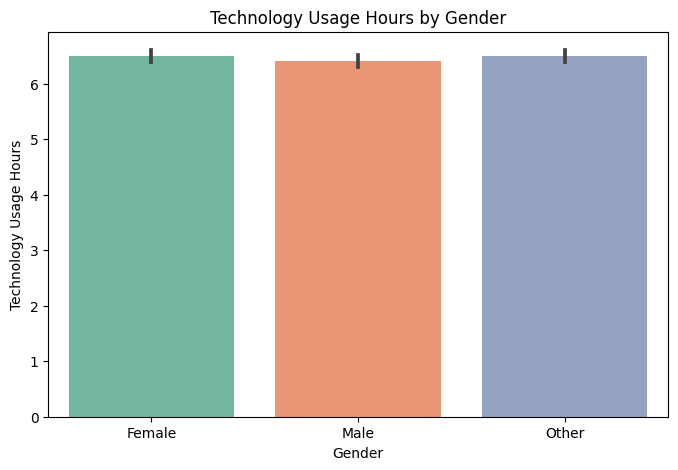

In [264]:
# Bar plot for Technology Usage Hours by Gender
plt.figure(figsize=(8,5))
sns.barplot(x='Gender', y='Technology_Usage_Hours', data=df, palette='Set2')
plt.title('Technology Usage Hours by Gender')
plt.xlabel('Gender')
plt.ylabel('Technology Usage Hours')
plt.show()

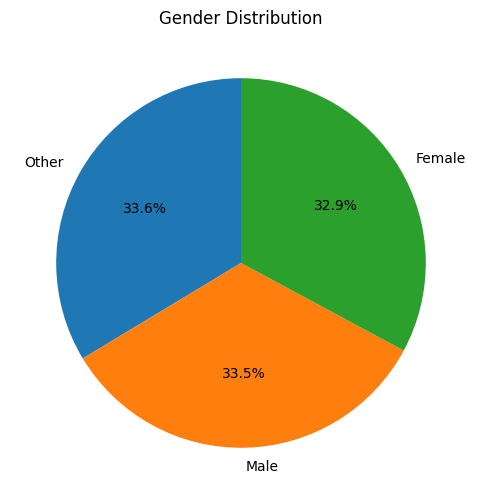

In [265]:
# Pie chart for Gender Distribution
plt.figure(figsize=(6,6))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

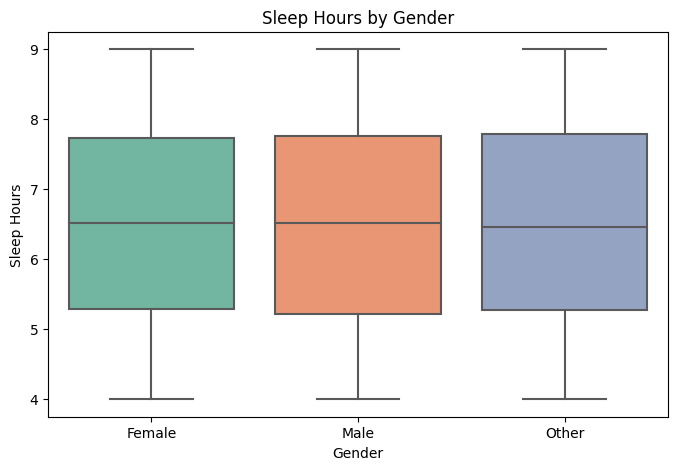

In [266]:
# Box plot for Sleep Hours by Gender
plt.figure(figsize=(8,5))
sns.boxplot(x='Gender', y='Sleep_Hours', data=df, palette='Set2')
plt.title('Sleep Hours by Gender')
plt.xlabel('Gender')
plt.ylabel('Sleep Hours')
plt.show()

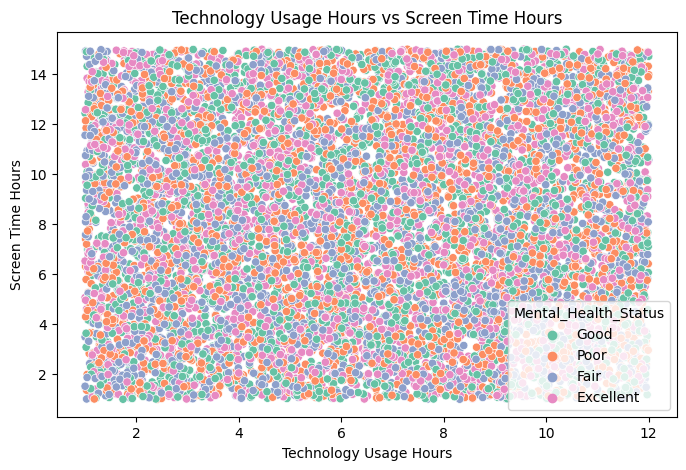

In [267]:
# Scatter plot for Technology Usage Hours vs Screen Time Hours
plt.figure(figsize=(8,5))
sns.scatterplot(x='Technology_Usage_Hours', y='Screen_Time_Hours', data=df, hue='Mental_Health_Status', palette='Set2')
plt.title('Technology Usage Hours vs Screen Time Hours')
plt.xlabel('Technology Usage Hours')
plt.ylabel('Screen Time Hours')
plt.show()

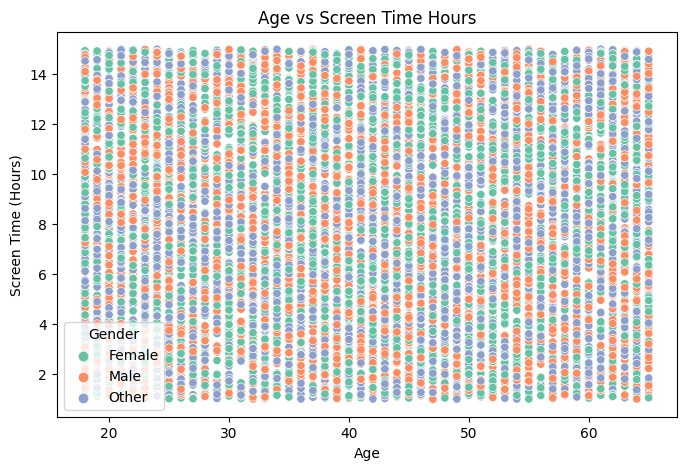

In [268]:
# Scatter plot for Age vs Screen Time Hours
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Screen_Time_Hours', data=df, hue='Gender', palette='Set2')
plt.title('Age vs Screen Time Hours')
plt.xlabel('Age')
plt.ylabel('Screen Time (Hours)')
plt.show()

['Low' 'High' 'Medium']


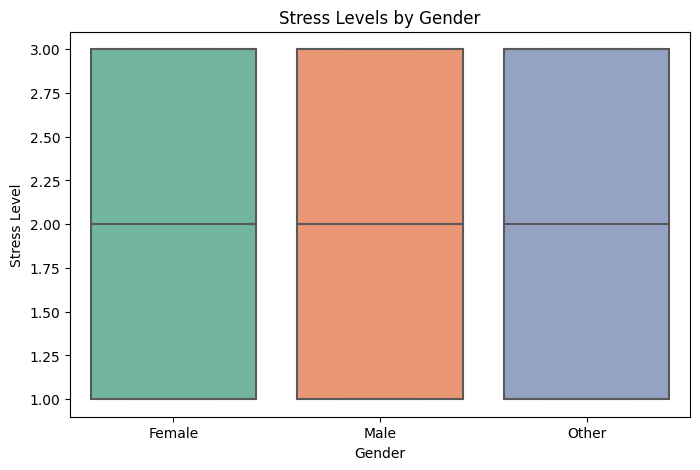

In [269]:
# Check the unique values in the Stress_Level column
print(df['Stress_Level'].unique())

# Convert categorical stress levels to numeric values
stress_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Stress_Level'] = df['Stress_Level'].map(stress_mapping)

# Now create the boxplot again
plt.figure(figsize=(8,5))
sns.boxplot(x='Gender', y='Stress_Level', data=df, palette='Set2')
plt.title('Stress Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Stress Level')
plt.show()

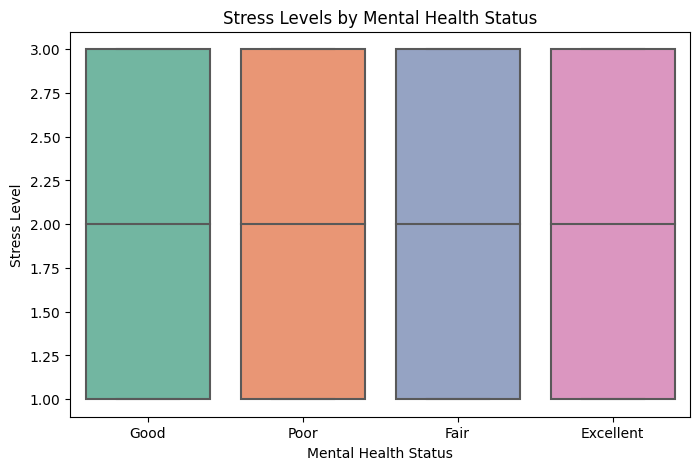

In [270]:
# Box plot for Stress Levels by Mental Health Status
plt.figure(figsize=(8,5))
sns.boxplot(x='Mental_Health_Status', y='Stress_Level', data=df, palette='Set2')
plt.title('Stress Levels by Mental Health Status')
plt.xlabel('Mental Health Status')
plt.ylabel('Stress Level')
plt.show()

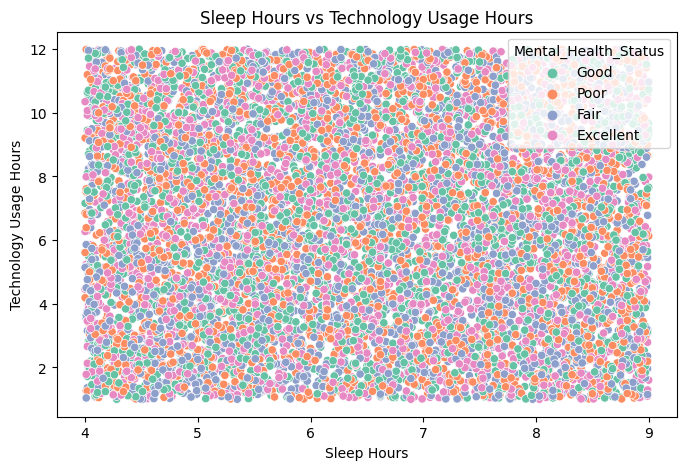

In [271]:
# Scatter plot for Sleep Hours vs Technology Usage Hours
plt.figure(figsize=(8,5))
sns.scatterplot(x='Sleep_Hours', y='Technology_Usage_Hours', data=df, hue='Mental_Health_Status', palette='Set2')
plt.title('Sleep Hours vs Technology Usage Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Technology Usage Hours')
plt.show()

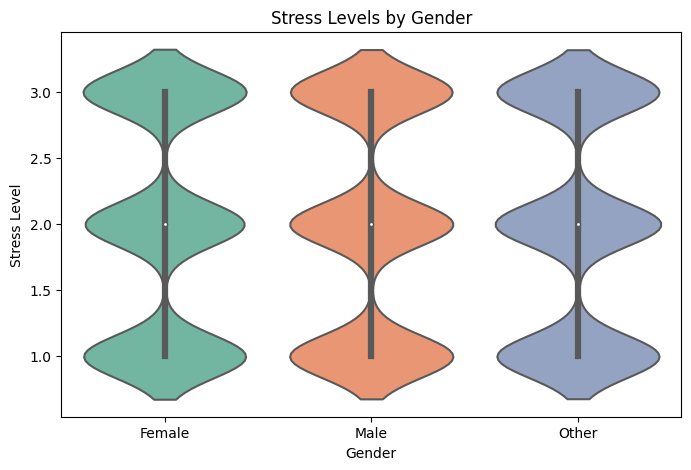

In [272]:
# Violin plot for Stress Levels by Gender
plt.figure(figsize=(8,5))
sns.violinplot(x='Gender', y='Stress_Level', data=df, palette='Set2')
plt.title('Stress Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Stress Level')
plt.show()

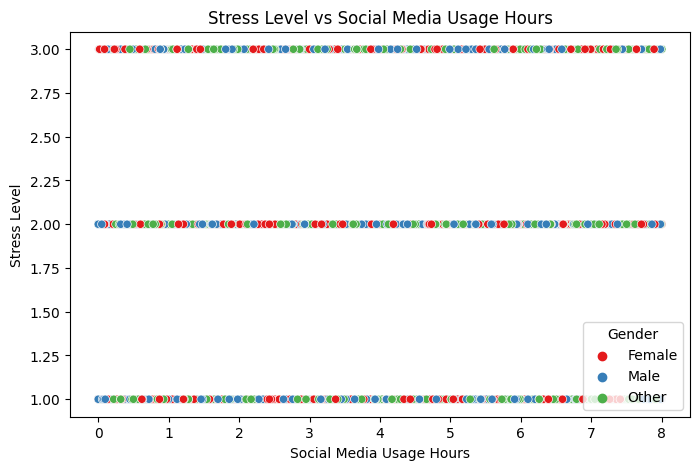

In [273]:
# Scatter plot for Stress Level vs Social Media Usage Hours
plt.figure(figsize=(8,5))
sns.scatterplot(x='Social_Media_Usage_Hours', y='Stress_Level', data=df, hue='Gender', palette='Set1')
plt.title('Stress Level vs Social Media Usage Hours')
plt.xlabel('Social Media Usage Hours')
plt.ylabel('Stress Level')
plt.show()

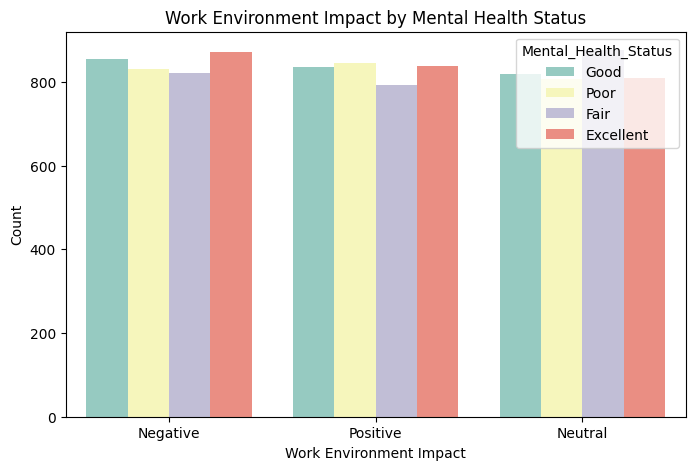

In [274]:
# Count plot for Work Environment Impact by Mental Health Status
plt.figure(figsize=(8,5))
sns.countplot(x='Work_Environment_Impact', hue='Mental_Health_Status', data=df, palette='Set3')
plt.title('Work Environment Impact by Mental Health Status')
plt.xlabel('Work Environment Impact')
plt.ylabel('Count')
plt.show()

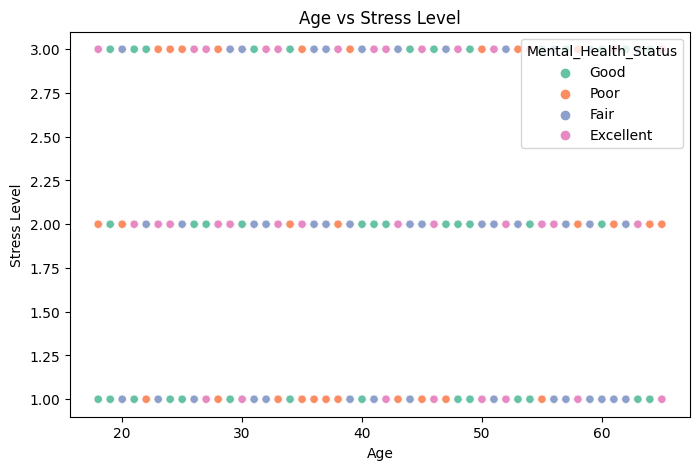

In [275]:
# Scatter plot for Age vs Stress Level
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Stress_Level', data=df, hue='Mental_Health_Status', palette='Set2')
plt.title('Age vs Stress Level')
plt.xlabel('Age')
plt.ylabel('Stress Level')
plt.show()

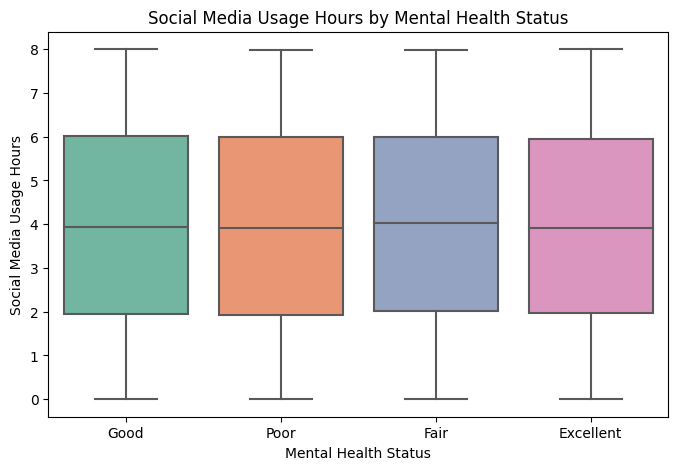

In [276]:
# Box plot for Social Media Usage Hours by Mental Health Status
plt.figure(figsize=(8,5))
sns.boxplot(x='Mental_Health_Status', y='Social_Media_Usage_Hours', data=df, palette='Set2')
plt.title('Social Media Usage Hours by Mental Health Status')
plt.xlabel('Mental Health Status')
plt.ylabel('Social Media Usage Hours')
plt.show()

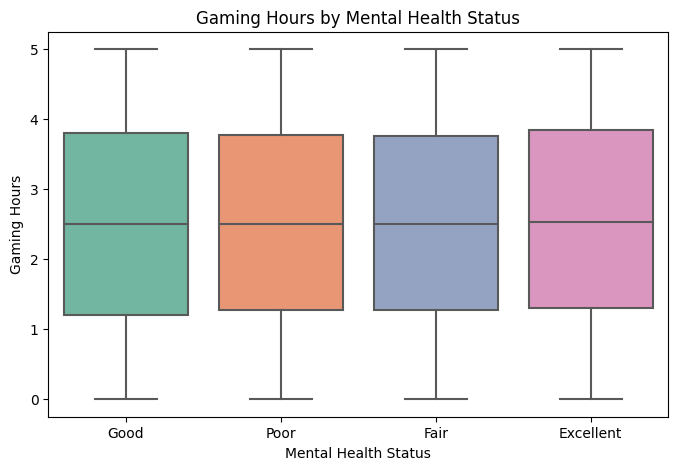

In [277]:
# Box plot for Gaming Hours by Mental Health Status
plt.figure(figsize=(8,5))
sns.boxplot(x='Mental_Health_Status', y='Gaming_Hours', data=df, palette='Set2')
plt.title('Gaming Hours by Mental Health Status')
plt.xlabel('Mental Health Status')
plt.ylabel('Gaming Hours')
plt.show()

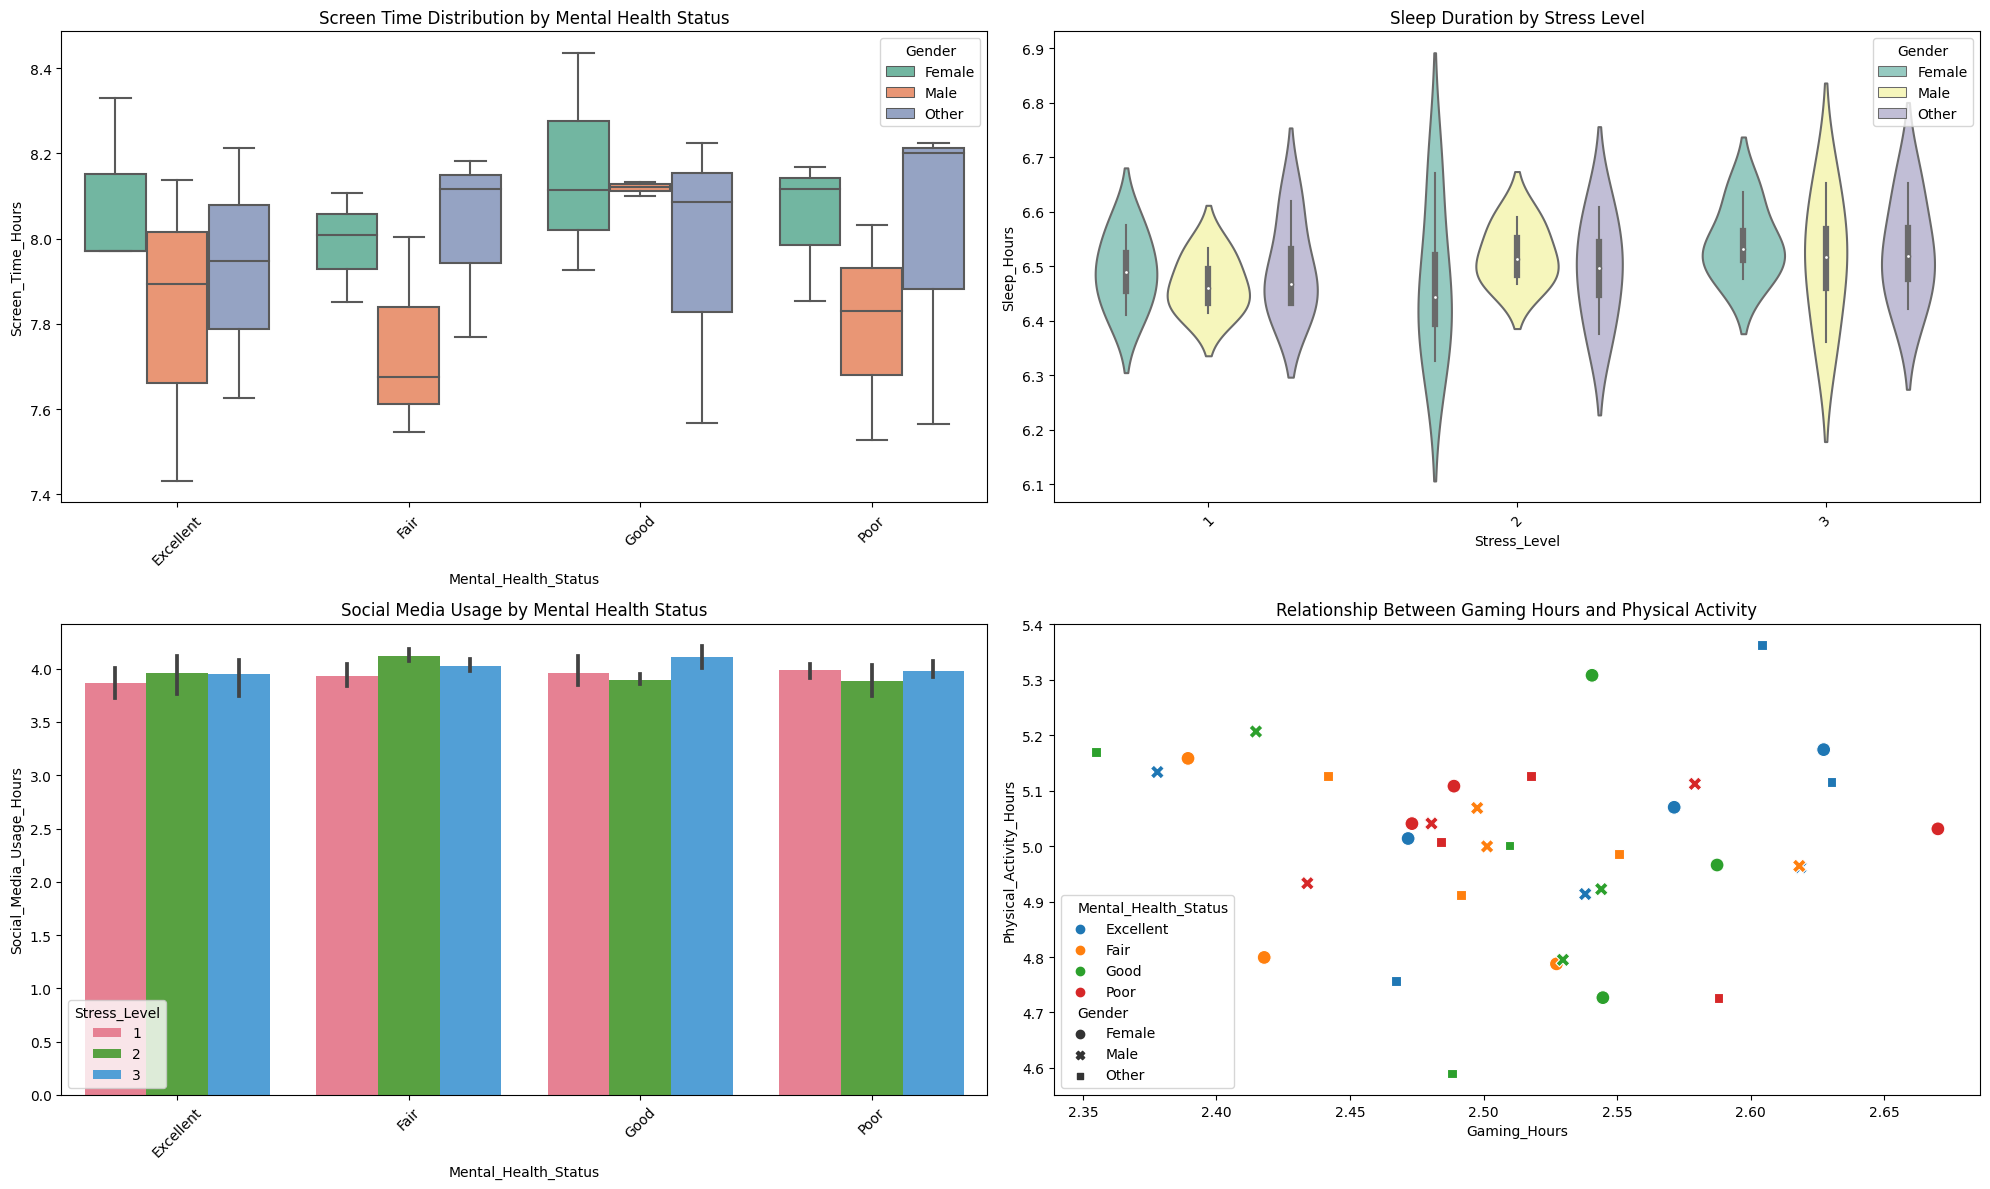

In [278]:
df = df.groupby(['Gender','Mental_Health_Status', 'Stress_Level']).agg({
    'Screen_Time_Hours': 'mean',
    'Sleep_Hours': 'mean',
    'Technology_Usage_Hours':'mean',
    'Social_Media_Usage_Hours': 'mean',
    'Gaming_Hours': 'mean',
    'Physical_Activity_Hours':'mean'
}).reset_index()

# Visualizes the relationships between technology usage and mental health status
def mental_health(df):
    # Set the figure size
    plt.figure(figsize=(20, 12))
    
    # Screen Time Distribution by Mental Health Status
    plt.subplot(2, 2, 1)
   # Used subplot to create multiple plots in one figure
   # Created a 2x2 grid and placed this plot in the top-left
    sns.boxplot(data=df, x='Mental_Health_Status', y='Screen_Time_Hours', 
                hue='Gender', palette='Set2')
    plt.title('Screen Time Distribution by Mental Health Status', size=12)
    plt.xticks(rotation=45)
    # Rotated x-axis labels with xticks
    
    # Sleep Hours by Stress Level
    plt.subplot(2, 2, 2)
    sns.violinplot(data=df, x='Stress_Level', y='Sleep_Hours', 
                  hue='Gender', palette='Set3')
    plt.title('Sleep Duration by Stress Level', size=12)
    plt.xticks(rotation=45)
    
    # Social Media Usage by Mental Health Status
    plt.subplot(2, 2, 3)
    sns.barplot(data=df, x='Mental_Health_Status', y='Social_Media_Usage_Hours',
                hue='Stress_Level', palette='husl')
    plt.title('Social Media Usage by Mental Health Status', size=12)
    plt.xticks(rotation=45)

    # Relationship Between Gaming Hours and Physical Activity
    plt.subplot(2, 2, 4)
    sns.scatterplot(data=df, x='Gaming_Hours', y='Physical_Activity_Hours',
                    hue='Mental_Health_Status', style='Gender', s=100)
    plt.title('Relationship Between Gaming Hours and Physical Activity', size=12)
  

    
    
    plt.tight_layout()
    plt.show()

mental_health(df)

In [279]:
numeric_df = df.select_dtypes(include=['int64','float64'])
numeric_df.corr()

,Stress_Level,Screen_Time_Hours,Sleep_Hours,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Physical_Activity_Hours
Stress_Level,1.000000,-0.260689,0.210559,-0.154024,0.258933,-0.106467,0.277345
Screen_Time_Hours,-0.260689,1.000000,0.151433,0.213291,0.072838,0.047445,0.163174
Sleep_Hours,0.210559,0.151433,1.000000,-0.091974,0.234062,0.161184,-0.143746
Technology_Usage_Hours,-0.154024,0.213291,-0.091974,1.000000,-0.018987,0.117535,-0.066011
Social_Media_Usage_Hours,0.258933,0.072838,0.234062,-0.018987,1.000000,-0.325739,-0.236827
Gaming_Hours,-0.106467,0.047445,0.161184,0.117535,-0.325739,1.000000,-0.028517
Physical_Activity_Hours,0.277345,0.163174,-0.143746,-0.066011,-0.236827,-0.028517,1.000000


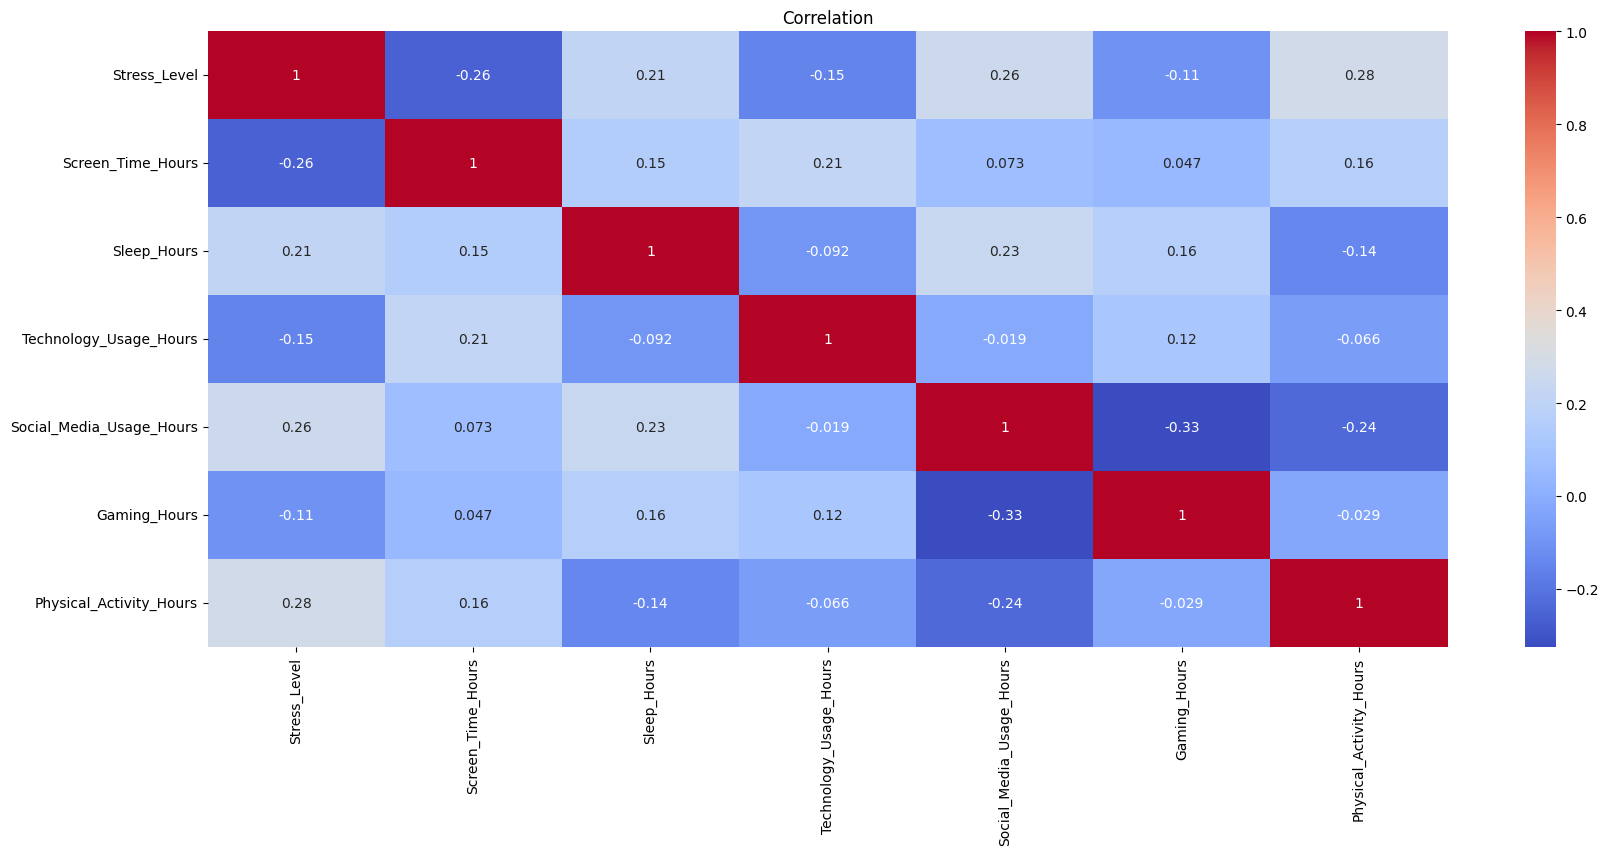

In [280]:
plt.figure(figsize=(20, 8))
sns.heatmap(numeric_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation")
plt.show()

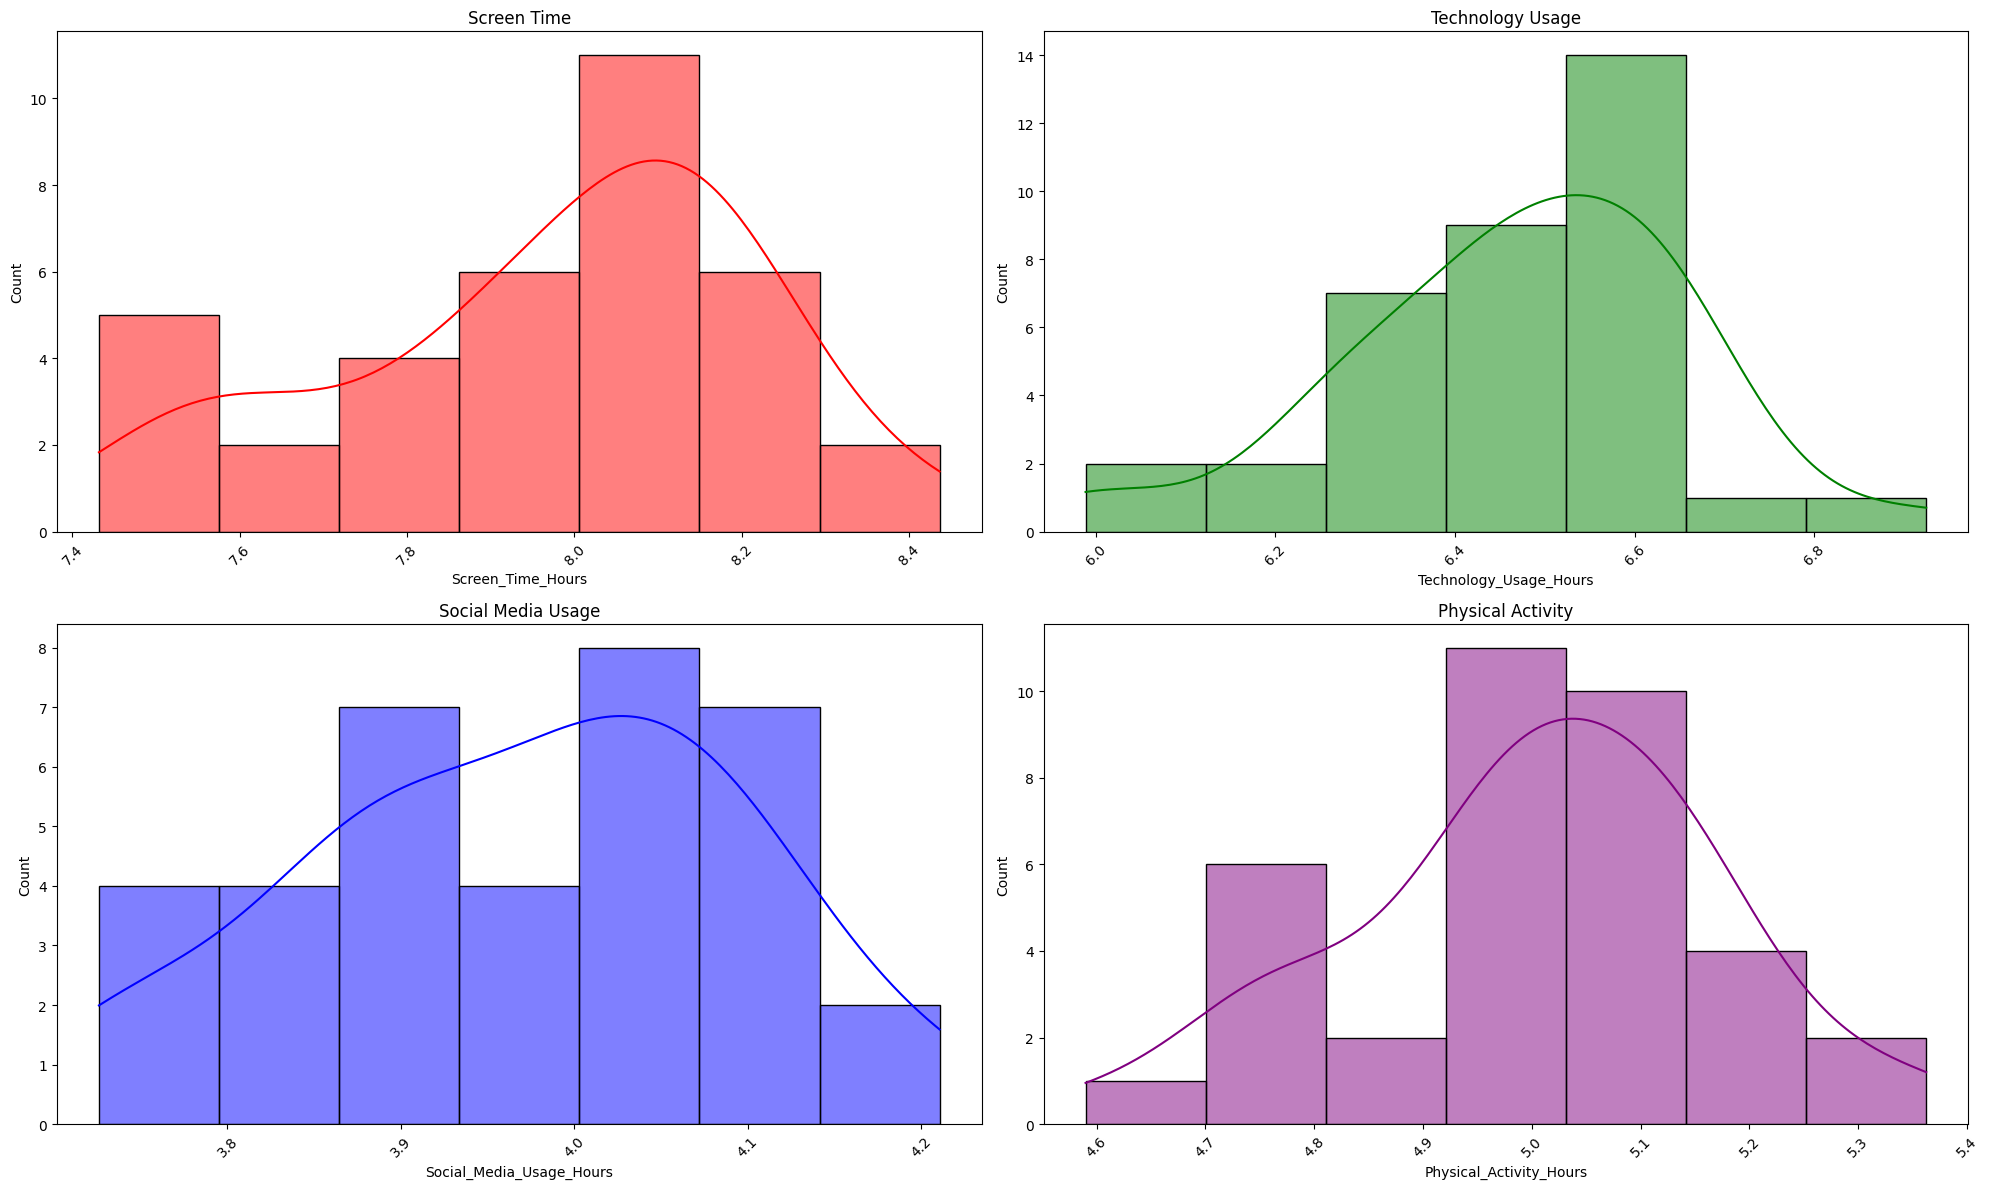

In [281]:
def hist_impression(numeric_df):
    plt.figure(figsize=(20, 12))
    
    # Screen Time Distribution
    plt.subplot(2, 2, 1)
    sns.histplot(data=numeric_df, x='Screen_Time_Hours', color='red', kde=True)
    plt.title('Screen Time', size=12)
    plt.xticks(rotation=45)
    
    # Technology Usage Distribution
    plt.subplot(2, 2, 2)
    sns.histplot(data=numeric_df, x='Technology_Usage_Hours', color='green', kde=True)
    plt.title('Technology Usage', size=12)
    plt.xticks(rotation=45)
    
    # Social Media Usage Distribution
    plt.subplot(2, 2, 3)
    sns.histplot(data=numeric_df, x='Social_Media_Usage_Hours', color='blue', kde=True)
    plt.title('Social Media Usage', size=12)
    plt.xticks(rotation=45)
    
    # Physical Activity Distribution
    plt.subplot(2, 2, 4)
    sns.histplot(data=numeric_df, x='Physical_Activity_Hours', color='purple', kde=True)
    plt.title('Physical Activity', size=12)
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

hist_impression(numeric_df)


Machine Learning 

In [282]:
numeric_df.head()

,Stress_Level,Screen_Time_Hours,Sleep_Hours,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Physical_Activity_Hours
0,1,8.330945,6.470000,6.576352,4.006482,2.471726,5.013811
1,2,7.971915,6.326631,6.273262,3.763333,2.571312,5.070142
2,3,7.970778,6.477315,6.458872,3.742568,2.627276,5.174163
3,1,8.009506,6.409753,6.274897,4.048642,2.389342,5.158395
4,2,8.107632,6.670940,6.021917,4.186880,2.527256,4.787594


In [283]:
df['Mental_Health_Status']

le = LabelEncoder()
df['Mental_Health_Status'] = le.fit_transform(df['Mental_Health_Status'])

In [284]:
X = numeric_df[['Screen_Time_Hours', 'Sleep_Hours', 'Technology_Usage_Hours', 'Social_Media_Usage_Hours','Physical_Activity_Hours']]
y = df['Stress_Level']

Scaling dataset

In [285]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train, test, split

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Logistic Regression

In [287]:
# 1. Create a pipeline (scaling + logistic regression)
pipeline = Pipeline([
    ('logreg', LogisticRegression())
])

# 2. Define the parameter grid
param_grid = {
    'logreg__C': [0.1, 1, 10],             # Regularization strength
    'logreg__penalty': ['l1', 'l2'],                 # Type of regularization
    'logreg__solver': ['liblinear', 'saga'],         # Solvers that support l1 and l2
}

# 3. Set up the grid search
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,                         # 5-fold cross-validation
    scoring='accuracy',           # or 'f1', 'roc_auc', etc.
    verbose=1,
    n_jobs=-1                     # Use all CPU cores
)

# 4. Fit to training data
grid.fit(X_train, y_train)

# 5. Best parameters and accuracy
print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

# 6. Evaluate on test set
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Parameters: {'logreg__C': 0.1, 'logreg__penalty': 'l2', 'logreg__solver': 'saga'}
Best Accuracy: 0.4666666666666666
              precision    recall  f1-score   support

           1       0.67      0.67      0.67         3
           2       0.00      0.00      0.00         3
           3       0.50      1.00      0.67         2

    accuracy                           0.50         8
   macro avg       0.39      0.56      0.44         8
weighted avg       0.38      0.50      0.42         8



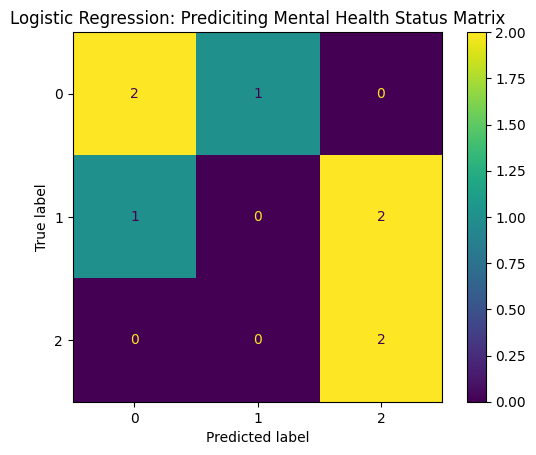

In [288]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.viridis)
plt.title('Logistic Regression: Prediciting Mental Health Status Matrix')
plt.show()

Random Forest and Gradient Boosting Classifier

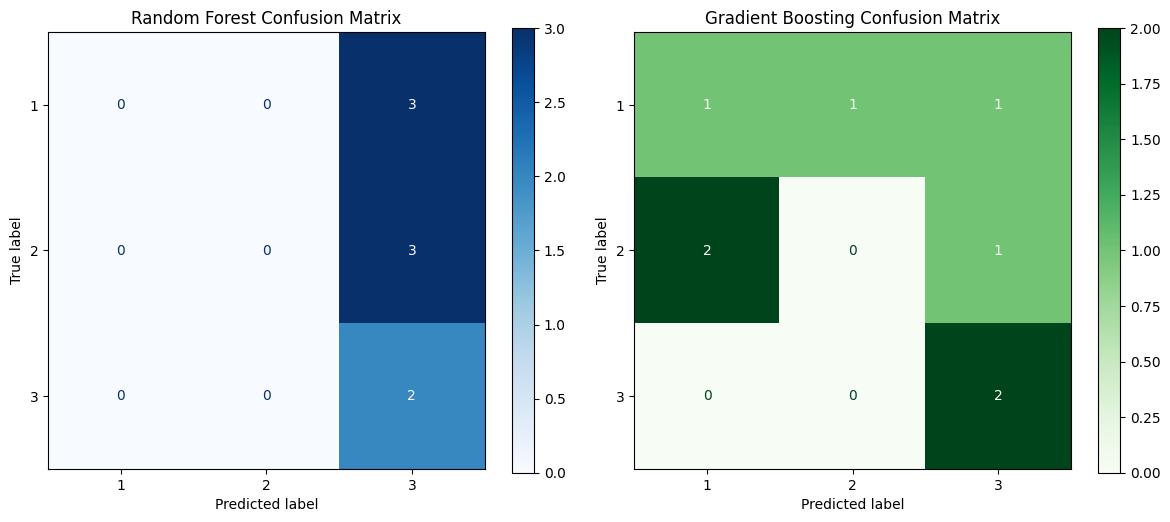

Accuracy Score: 0.25

Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       0.33      0.33      0.33         3
           2       0.00      0.00      0.00         3
           3       0.50      1.00      0.67         2

    accuracy                           0.38         8
   macro avg       0.28      0.44      0.33         8
weighted avg       0.25      0.38      0.29         8

Accuracy Score: 0.375

Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           1       0.33      0.33      0.33         3
           2       0.00      0.00      0.00         3
           3       0.50      1.00      0.67         2

    accuracy                           0.38         8
   macro avg       0.28      0.44      0.33         8
weighted avg       0.25      0.38      0.29         8



In [301]:
# Split data, initialize models, fit, predict
X_train, X_test, y_train, y_test_rf = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(random_state=42, n_estimators=500, max_depth=10, min_samples_split=50)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Split data, initialize models, fit, predict
X_train, X_test, y_train, y_test_gb = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
gb = GradientBoostingClassifier(max_depth = 5)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

# Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test_rf, rf_pred, ax=ax[0], cmap='Blues')
ax[0].set_title('Random Forest Confusion Matrix')

ConfusionMatrixDisplay.from_predictions(y_test_gb, gb_pred, ax=ax[1], cmap='Greens')
ax[1].set_title('Gradient Boosting Confusion Matrix')
plt.tight_layout()
plt.show()


# Print classification metrics
print("Accuracy Score:", accuracy_score(y_test_rf, rf_pred))
print("\nClassification Report (Random Forest):")
print(classification_report(y_test_rf, gb_pred))

# Print classification metrics
print("Accuracy Score:", accuracy_score(y_test_gb, gb_pred))
print("\nClassification Report (Gradient Boosting):")
print(classification_report(y_test_gb, gb_pred))
